Question 1: What is Anomaly Detection? Explain its types (point, contextual, and collective anomalies) with examples.

Ans : Anomaly Detection (or Outlier Detection) is the process of identifying data points, events, or observations that deviate significantly from the dataset's normal behavior. These irregularities often indicate critical incidents, such as fraud, errors, or defects.


There are three main types:

1. Point Anomalies: A single data point is far removed from the rest of the data.

- Example: A credit card transaction of $50,000 when the user usually spends $50.

2. Contextual Anomalies: A data point is considered abnormal only in a specific context (like time or location), even if the value itself is normal elsewhere.

- Example: A temperature of 30°C (86°F) is normal in Summer, but it is an anomaly if it occurs in the middle of Winter.

3. Collective Anomalies: A collection of related data points is anomalous relative to the entire dataset, even if the individual points might not be anomalies on their own.

- Example: A heart rate monitor showing a flat line for 10 seconds. The value "0" might be possible briefly, but a sequence of zeros indicates cardiac arrest.


Question 2 : Compare Isolation Forest, DBSCAN, and Local Outlier Factor in terms of their approach and suitable use cases.

Ans :
| Algorithm | Approach | Suitable Use Cases |
|----|----|----|
| Isolation Forest | Tree-based: It builds random trees. Anomalies are "easier to isolate" (they end up in shorter branches close to the root) than normal points. | High-dimensional data. Great for fraud detection or network security where speed is important. |
| DBSCAN | Density-based: It groups together points that are close to each other. Points in low-density regions that typically don't belong to any cluster are labeled as noise (anomalies). | Spatial data (e.g., GPS coordinates). Best when clusters have irregular shapes and you want to separate noise. |
| LOF (Local Outlier Factor) | Density-based (Local): It measures the local density deviation of a point with respect to its neighbors. It finds points that are less dense than their surrounding neighborhood. | Uneven density datasets. Good for detecting outliers in data where some clusters are very dense and others are sparse. |



Question 3: What are the key components of a Time Series? Explain each with one example.

Ans : A Time Series is typically decomposed into four components:

1. Trend: The long-term progression of the series (increasing, decreasing, or stable).

- Example: The global population has been steadily increasing over the last 50 years.

2. Seasonality: Repeating patterns or cycles that occur at fixed intervals (daily, monthly, yearly).

- Example: Ice cream sales always spike in July and drop in December every year.

3. Cyclical: Fluctuations occurring at irregular intervals, usually driven by economic conditions.

- Example: A stock market crash or recession that happens every 5-10 years (not a fixed calendar pattern).

4. Irregularity (Residual/Noise): Random, unpredictable fluctuations that remain after removing the trend and seasonality.

- Example: A sudden drop in airline traffic due to a volcanic eruption or a pandemic lockdown.



Question 4: Define Stationary in time series. How can you test and transform a non-stationary series into a stationary one?

Ans : Stationarity means that the statistical properties of a time series—like the mean, variance, and autocorrelation—do not change over time.10 Most forecasting models (like ARIMA) work best on stationary data.
- How to Test: Use the Augmented Dickey-Fuller (ADF) Test.
1. If p-value < 0.05: The series is Stationary.
2. If p-value > 0.05: The series is Non-Stationary.

- How to Transform:
1. Differencing: Subtract the current value from the previous value ($Y_t - Y_{t-1}$). This removes trends.
2. Log Transformation: Take the log of the values. This stabilizes increasing variance (heteroscedasticity).


Question 5: Differentiate between AR, MA, ARIMA, SARIMA, and SARIMAX models in terms of structure and application.

Ans :
| Model | Full Name | Structure / Key Feature | Application |
|---|---|---|---|
| AR | AutoRegressive | Predicts future based on past values of itself. | Good for data where history directly impacts the future (e.g., temperature). |
| MA | Moving Average | Predicts future based on past forecast errors. | Good for smoothing out noise in the data. |
| ARIMA | AutoRegressive Integrated Moving Average | Combines AR + MA and adds Integration (Differencing) to handle trends. | The standard for non-seasonal data with a trend (e.g., stock prices). |
| SARIMA | Seasonal ARIMA | ARIMA + Seasonality. Adds seasonal terms (S). | Data with clear recurring patterns (e.g., monthly sales, electricity load). |
| SARIMAX | Seasonal ARIMA with Exogenous variables | SARIMA + Exogenous (External) Variables (X). | Forecasting when outside factors help (e.g., predicting ice cream sales using Temperature as an external feature). |

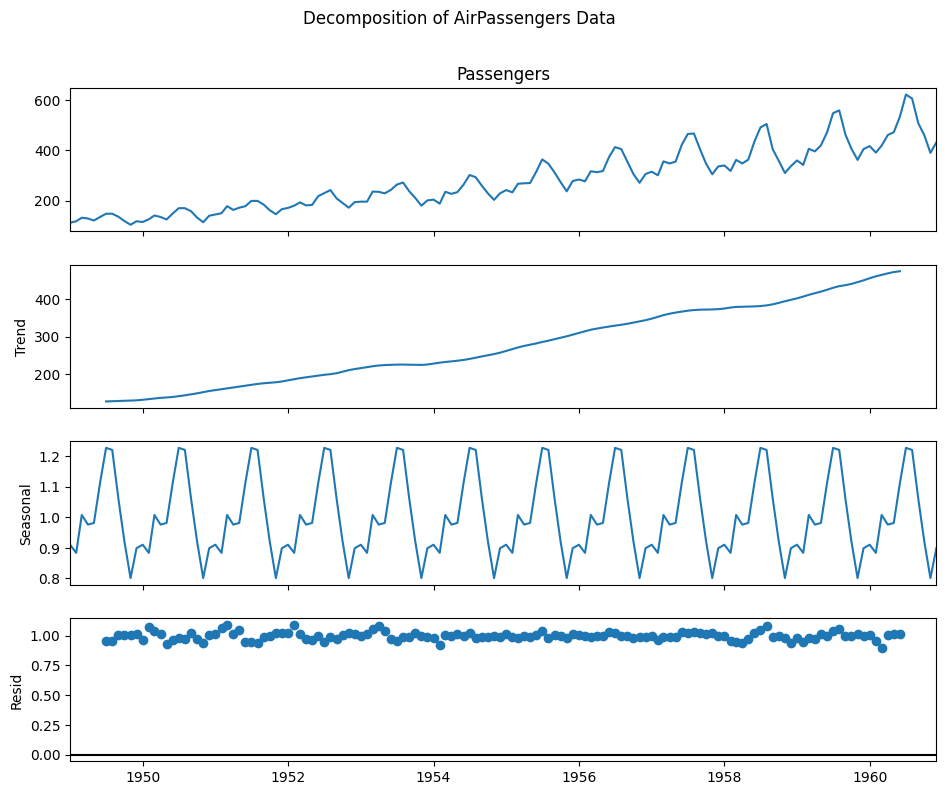

In [6]:
'''Question 6: Load a time series dataset (e.g., AirPassengers), plot the original
series, and decompose it into trend, seasonality, and residual components.'''

import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# 1. Load Data (Using the fixed direct download link)
file_id = '1eu6DQtqaH2qmJZU_RU5tQe5hhYejjXW3'
url = f'https://drive.google.com/uc?id={file_id}'

df = pd.read_csv(url, parse_dates=['Month'], index_col='Month')

# 2. Fix Column Name (Renaming '#Passengers' to 'Passengers')
df.rename(columns={df.columns[0]: 'Passengers'}, inplace=True)

# 3. Decompose the Series
# 'multiplicative' is used because the waves get bigger over time
decomposition = seasonal_decompose(df['Passengers'], model='multiplicative')

# 4. Plot
fig = decomposition.plot()
fig.set_size_inches(10, 8)
plt.suptitle('Decomposition of AirPassengers Data', y=1.02)
plt.show()

Using columns: 'trip_distance' and 'fare_amount'


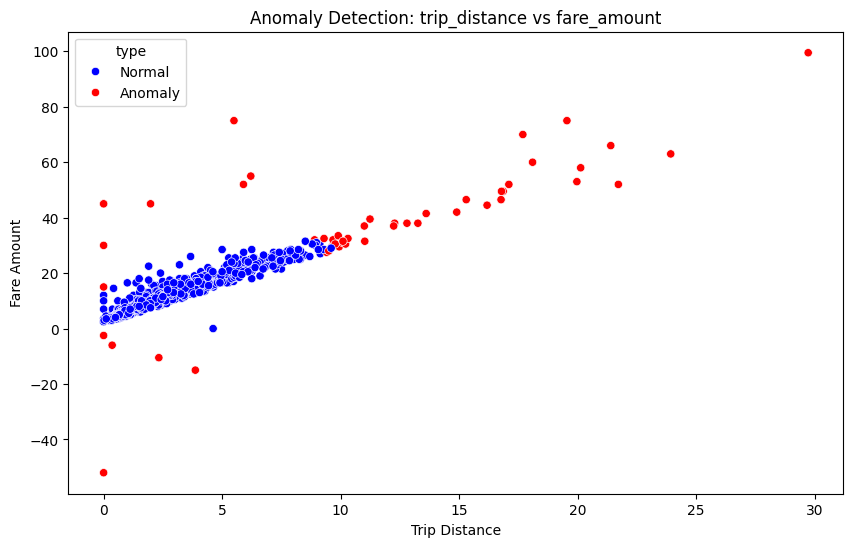

In [14]:
'''Question 7: Apply Isolation Forest on a numerical dataset (e.g., NYC Taxi Fare)
   to detect anomalies. Visualize the anomalies on a 2D scatter plot.'''


import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
import seaborn as sns

# 1. Load Data
# We read only the first 50,000 rows to make it fast and prevent crashing
df = pd.read_csv('NYC_taxi_fare_data.csv', nrows=50000)

# 2. Auto-Detect Correct Column Names
# Searches for columns with "dist" and "fare" in their names
dist_col = [c for c in df.columns if 'dist' in c.lower()][0]
fare_col = [c for c in df.columns if 'fare' in c.lower() or 'amount' in c.lower()][0]
print(f"Using columns: '{dist_col}' and '{fare_col}'")

# 3. Prepare Data
# Remove empty rows and take a small random sample (1000 points) for a clean plot
data = df[[dist_col, fare_col]].dropna().sample(1000, random_state=42)

# 4. Train Isolation Forest
# contamination=0.05 means we look for the top 5% most abnormal points
iso = IsolationForest(contamination=0.05, random_state=42)
data['anomaly'] = iso.fit_predict(data)

# Map results: -1 is Anomaly (Red), 1 is Normal (Blue)
data['type'] = data['anomaly'].map({1: 'Normal', -1: 'Anomaly'})

# 5. Visualize
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x=dist_col, y=fare_col, hue='type', palette={'Normal': 'blue', 'Anomaly': 'red'})
plt.title(f"Anomaly Detection: {dist_col} vs {fare_col}")
plt.xlabel("Trip Distance")
plt.ylabel("Fare Amount")
plt.show()

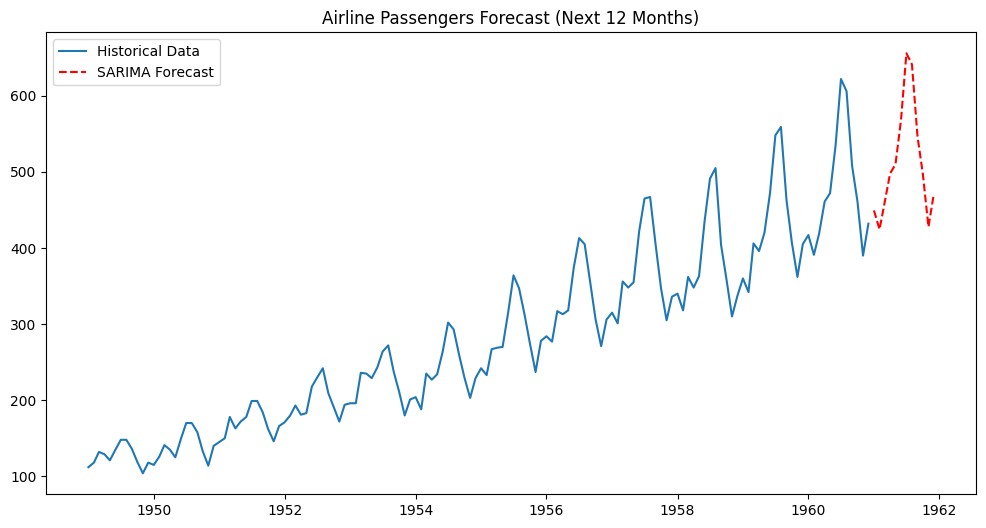

In [8]:
'''Question 8: Train a SARIMA model on the monthly airline passengers dataset.
   Forecast the next 12 months and visualize the results.'''


import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX

# 1. Load Data
file_id = '1eu6DQtqaH2qmJZU_RU5tQe5hhYejjXW3'
url = f'https://drive.google.com/uc?id={file_id}'
df = pd.read_csv(url, parse_dates=['Month'], index_col='Month')

# Fix Column Name
df.rename(columns={df.columns[0]: 'Passengers'}, inplace=True)
df.index.freq = 'MS' # Set frequency to Month Start

# 2. Train SARIMA Model
# (1,1,1) are standard non-seasonal params
# (1,1,1,12) are seasonal params (12 months cycle)
model = SARIMAX(df['Passengers'],
                order=(1, 1, 1),
                seasonal_order=(1, 1, 1, 12))
results = model.fit(disp=False)

# 3. Forecast Next 12 Months
forecast = results.get_forecast(steps=12)
forecast_index = forecast.predicted_mean.index
forecast_values = forecast.predicted_mean

# 4. Visualize
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Passengers'], label='Historical Data')
plt.plot(forecast_index, forecast_values, color='red', label='SARIMA Forecast', linestyle='--')
plt.title('Airline Passengers Forecast (Next 12 Months)')
plt.legend()
plt.show()

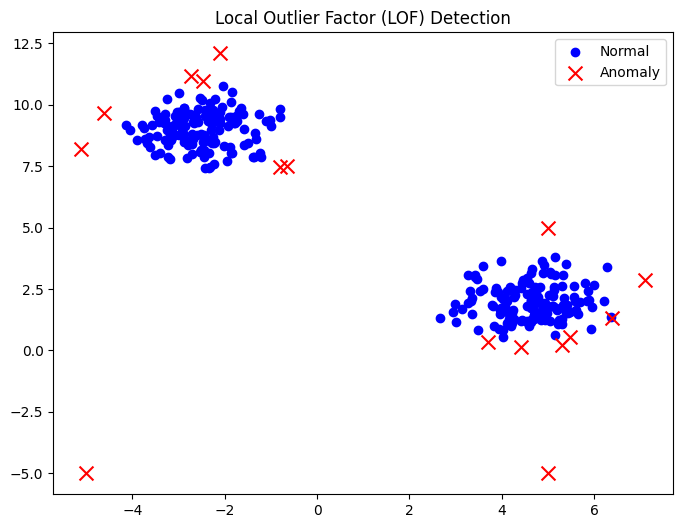

In [9]:
'''Question 9: Apply Local Outlier Factor (LOF) on any numerical dataset to detect
   anomalies and visualize them using matplotlib.'''


import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import LocalOutlierFactor
from sklearn.datasets import make_blobs

# 1. Generate Synthetic Data
X, _ = make_blobs(n_samples=300, centers=2, cluster_std=0.8, random_state=42)
# Add some manual outliers (points far away from clusters)
X_outliers = np.array([[5, 5], [-5, -5], [5, -5]])
X_combined = np.vstack([X, X_outliers])

# 2. Apply Local Outlier Factor (LOF)
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.05)
y_pred = lof.fit_predict(X_combined)

# 3. Visualize
plt.figure(figsize=(8, 6))
# Plot Normal points (Blue)
plt.scatter(X_combined[y_pred == 1, 0], X_combined[y_pred == 1, 1], c='blue', label='Normal')
# Plot Anomalies (Red X)
plt.scatter(X_combined[y_pred == -1, 0], X_combined[y_pred == -1, 1], c='red', s=100, marker='x', label='Anomaly')
plt.title("Local Outlier Factor (LOF) Detection")
plt.legend()
plt.show()

Question 10: You are working as a data scientist for a power grid monitoring company. Your goal is to forecast energy demand and also detect abnormal spikes or drops... Explain your workflow and provide a simulation.

Ans : Real-Time Workflow Strategy
1. Anomaly Detection: I would use Isolation Forest. It is very fast and efficient for high-dimensional streaming data, which is crucial for real-time power grid monitoring to prevent blackouts.

2. Forecasting: I would use SARIMAX. Energy demand has strong daily and weekly seasonality and is heavily affected by external variables like Temperature. SARIMAX handles both.

3. Monitoring: I would use MAPE (Mean Absolute Percentage Error) to check accuracy and retrain the model weekly.

/tmp/ipython-input-2208736044.py:9: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  dates = pd.date_range(start='2024-01-01', periods=200, freq='H')
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)


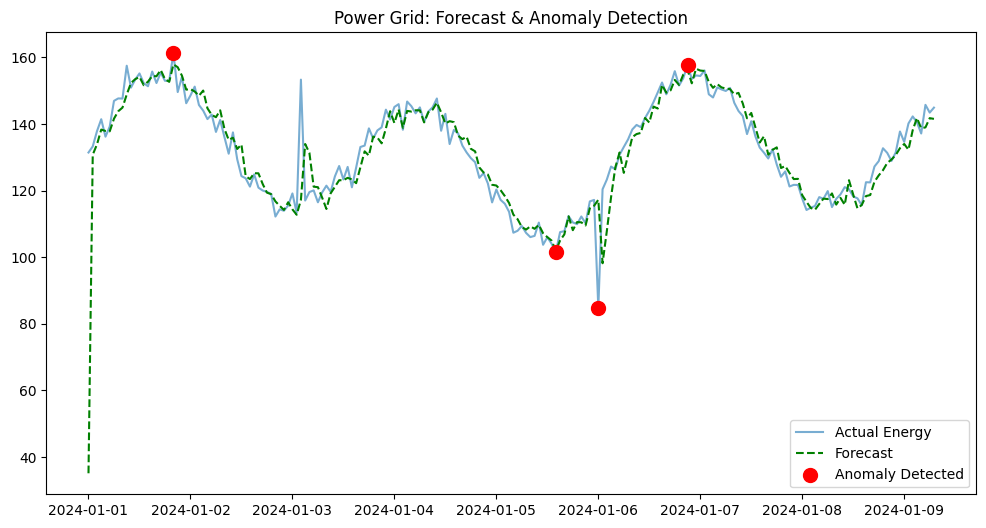

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.ensemble import IsolationForest

# --- 1. Simulate Power Grid Data ---
np.random.seed(42)
dates = pd.date_range(start='2024-01-01', periods=200, freq='H')

# Simulate Temperature (External factor)
temperature = 20 + 5 * np.sin(np.linspace(0, 10, 200)) + np.random.normal(0, 1, 200)

# Simulate Energy Consumption (Pattern + Temp + Noise)
energy = 100 + 20 * np.sin(np.linspace(0, 20, 200)) + 1.5 * temperature + np.random.normal(0, 2, 200)

# Add Artificial Spikes (Anomalies)
energy[50] += 40  # Spike
energy[120] -= 35 # Drop

df = pd.DataFrame({'Timestamp': dates, 'Energy': energy, 'Temperature': temperature})
df.set_index('Timestamp', inplace=True)

# --- 2. Forecast (SARIMAX) ---
# Predicting Energy using Temperature as exogenous input
model = SARIMAX(df['Energy'], exog=df[['Temperature']], order=(1, 1, 1))
results = model.fit(disp=False)
df['Forecast'] = results.predict(exog=df[['Temperature']])

# --- 3. Detect Anomalies (Isolation Forest) ---
iso = IsolationForest(contamination=0.02, random_state=42)
df['Anomaly'] = iso.fit_predict(df[['Energy']])
anomalies = df[df['Anomaly'] == -1]

# --- 4. Visualize ---
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Energy'], label='Actual Energy', alpha=0.6)
plt.plot(df.index, df['Forecast'], label='Forecast', linestyle='--', color='green')
plt.scatter(anomalies.index, anomalies['Energy'], color='red', s=100, label='Anomaly Detected', zorder=5)
plt.title("Power Grid: Forecast & Anomaly Detection")
plt.legend()
plt.show()